# **Regularization Techniques (Ridge, Lasso, and Elastic Net)**

---

This enhanced chapter now includes a discussion of **model fitting**—overfitting, underfitting, and good fitting—along with examples and visualizations to clarify these concepts in the context of Ridge, Lasso, and Elastic Net regularization.

---

### **Step 1: Why Regularization?**

- **Overfitting**: The model learns patterns, including noise, in the training data, leading to poor generalization on unseen data.
- **Underfitting**: The model is too simple and fails to capture the underlying relationships in the data.
- **Good Fitting**: The model captures the essential patterns in the data while generalizing well to new data.

Regularization helps achieve **good fitting** by controlling model complexity.

---

### **Step 2: Understanding Fitting**

#### **Overfitting**
Occurs when the model fits the training data too closely, capturing noise and leading to high variance.

- **Symptoms**:
  - High training accuracy.
  - Poor test performance.
- **Example**:
  A high-degree polynomial may fit every point in the training data but generalizes poorly.
#### **Underfitting**
Occurs when the model is too simple to capture the underlying structure of the data.

- **Symptoms**:
  - Low training and test accuracy.
  - High bias.
- **Example**:
  A linear model may fail to fit data with a clear non-linear pattern.
#### **Optimal Fitting**
Occurs when the model captures the general trend in the data while ignoring noise.

- **Symptoms**:
  - High training and test accuracy.
  - Balanced bias and variance.
---

<img src = 'images/fitting.png'>

### **Step 3: Ridge Regression $((L_2)$ Regularization)**

#### **Cost Function**
Ridge Regression adds the squared magnitude of the coefficients as a penalty term to the cost function:

$
J(\theta) = MSE(\theta) + \lambda \sum_{j=1}^{n} \theta_j^2
$

Where:
- $(\lambda)$: Regularization strength. A larger $(\lambda)$ results in greater shrinkage of the coefficients.

### **Dataset Generation**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Generate synthetic dataset
np.random.seed(42)

In [3]:
# Features
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
X_train = X[:80]  # Training set (80% of data)
X_test = X[80:]   # Test set (20% of data)

In [4]:
# Target variable (linear relationship with noise)
y = 4 + 3 * X + np.random.randn(100, 1)
y_train = y[:80]  # Training targets
y_test = y[80:]   # Test targets

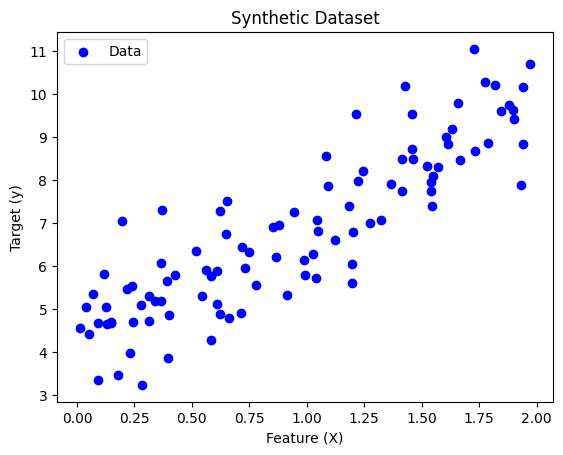

In [5]:
# Visualize the dataset
plt.scatter(X, y, color='blue', label='Data')
plt.title("Synthetic Dataset")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

In [6]:
# Print data shapes for clarity
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80, 1)
y_train shape: (80, 1)
X_test shape: (20, 1)
y_test shape: (20, 1)


This script will generate a dataset with:
- **Features $((X))$**: Random values between 0 and 2.
- **Targets $((y))$**: Linearly dependent on $(X)$ with added Gaussian noise.

#### **Implementation with Scikit-learn**

In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
ridge_reg = Ridge(alpha=1.0)  # Regularization strength
ridge_reg.fit(X_train, y_train)

Ridge()

In [9]:
# Predictions and evaluation
y_pred_ridge = ridge_reg.predict(X_test)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression R²:", r2_score(y_test, y_pred_ridge))

Ridge Regression MSE: 1.0046665245582733
Ridge Regression R²: 0.7216038306830188


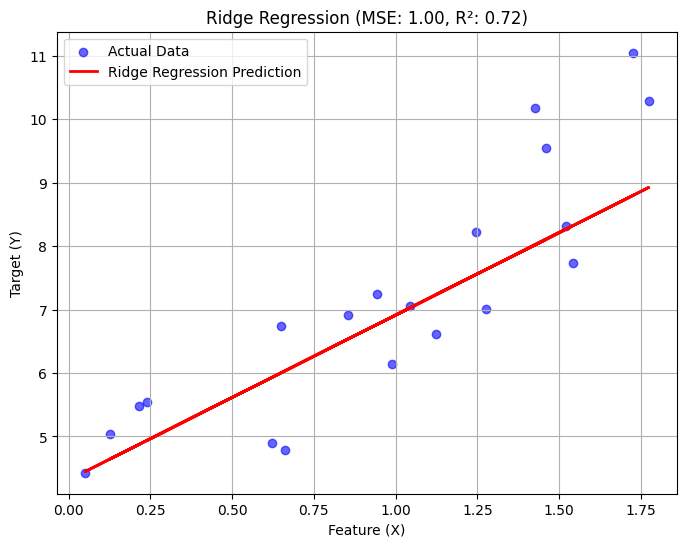

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label="Actual Data")
plt.plot(X_test, y_pred_ridge, color='red', linewidth=2, label="Ridge Regression Prediction")
plt.title(f"Ridge Regression (MSE: {mean_squared_error(y_test, y_pred_ridge):.2f}, "
          f"R²: {r2_score(y_test, y_pred_ridge):.2f})")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.grid(True)
plt.show()

#### **Effect of $(\lambda)$ on Overfitting and Underfitting**

- **Low $(\lambda)$**: Minimal penalty, model behaves like standard Linear Regression. Prone to **overfitting**.
- **High $(\lambda)$**: Large penalty, model simplifies significantly. Prone to **underfitting**.

---

### **Step 4: Lasso Regression $((L_1)$ Regularization)**

#### **Cost Function**
Lasso Regression adds the absolute magnitude of the coefficients as a penalty term:

$
J(\theta) = MSE(\theta) + \lambda \sum_{j=1}^{n} |\theta_j|
$

Key characteristics:
- Shrinks some coefficients to exactly zero, effectively performing **feature selection**.

#### **Implementation with Scikit-learn**

In [11]:
from sklearn.linear_model import Lasso

In [12]:
# Train a Lasso Regression model
lasso_reg = Lasso(alpha=0.1)  # Regularization strength
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [13]:
# Predictions and evaluation
y_pred_lasso = lasso_reg.predict(X_test)
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression R²:", r2_score(y_test, y_pred_lasso))

Lasso Regression MSE: 1.0789783780314943
Lasso Regression R²: 0.7010117886112621


In [14]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

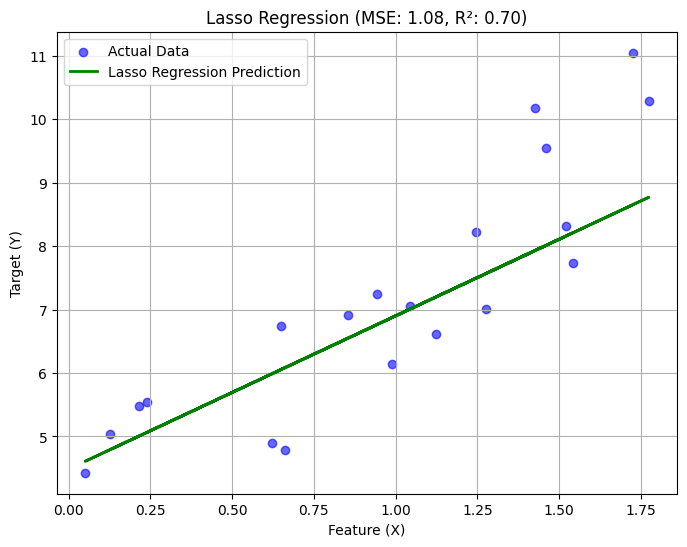

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label="Actual Data")
plt.plot(X_test, y_pred_lasso, color='green', linewidth=2, label="Lasso Regression Prediction")
plt.title(f"Lasso Regression (MSE: {mse_lasso:.2f}, R²: {r2_lasso:.2f})")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.grid(True)
plt.show()

#### **Effect of \(\lambda\) on Overfitting and Underfitting**

- **Low $(\lambda)$**: Retains all features, including noisy ones. Prone to **overfitting**.
- **High $(\lambda)$**: Eliminates many features, simplifying the model. Prone to **underfitting**.

---

### **Step 5: Elastic Net (Combination of Ridge and Lasso)**

#### **Cost Function**
Elastic Net combines $(L_1)$ and $(L_2)$ penalties:
$
J(\theta) = MSE(\theta) + \lambda_1 \sum_{j=1}^{n} |\theta_j| + \lambda_2 \sum_{j=1}^{n} \theta_j^2
$

Key characteristics:
- Balances the strengths of Ridge and Lasso.
- Useful when features are highly correlated or in high-dimensional data.

#### **Implementation with Scikit-learn**

In [16]:
from sklearn.linear_model import ElasticNet

In [17]:
# Train an Elastic Net Regression model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio balances L1 and L2
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [18]:
# Predictions and evaluation
y_pred_elastic = elastic_net.predict(X_test)
print("Elastic Net Regression MSE:", mean_squared_error(y_test, y_pred_elastic))
print("Elastic Net Regression R²:", r2_score(y_test, y_pred_elastic))

Elastic Net Regression MSE: 1.1638052409658417
Elastic Net Regression R²: 0.6775060052305707


In [19]:
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

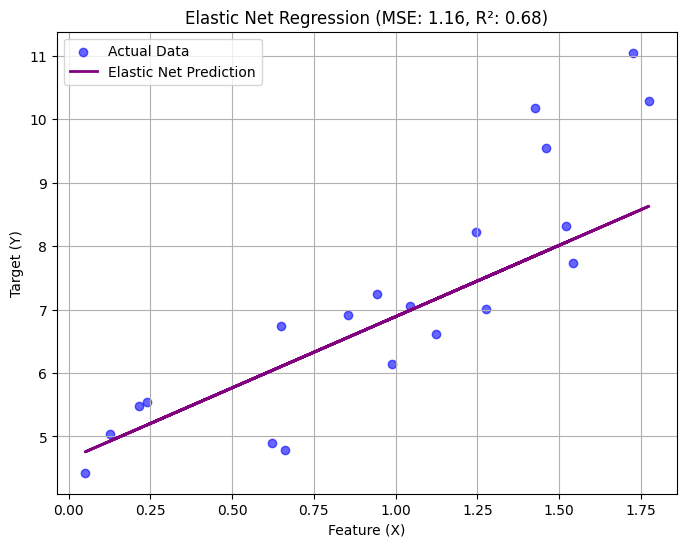

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label="Actual Data")
plt.plot(X_test, y_pred_elastic, color='purple', linewidth=2, label="Elastic Net Prediction")
plt.title(f"Elastic Net Regression (MSE: {mse_elastic:.2f}, R²: {r2_elastic:.2f})")
plt.xlabel("Feature (X)")
plt.ylabel("Target (Y)")
plt.legend()
plt.grid(True)
plt.show()

---

### **Step 6: Comparing Regularization Techniques**

We can compare the impact of each regularization technique on the coefficients.

In [21]:
import pandas as pd

In [22]:
# Collecting coefficients
coeff_df = pd.DataFrame({
    "Feature": ["Intercept"] + [f"x{i}" for i in range(1, X.shape[1] + 1)],
    "Ridge": [ridge_reg.intercept_[0]] + list(ridge_reg.coef_.flatten()),
    "Lasso": [lasso_reg.intercept_] + list(lasso_reg.coef_),
    "Elastic Net": [elastic_net.intercept_] + list(elastic_net.coef_)
})

In [23]:
coeff_df

,Feature,Ridge,Lasso,Elastic Net
0,Intercept,4.316056,[4.486569613827191],[4.643650599966643]
1,x1,2.596121,2.413123,2.244541


---

### **Step 7: Tuning Regularization Strength**

The regularization parameter (\(\lambda\)) controls the penalty's strength:
- **High $(\lambda)$**: Strong regularization (coefficients shrink more).
- **Low $(\lambda)$**: Weak regularization (model behaves like standard Linear Regression).

Use cross-validation to select the optimal \(\lambda\):

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Define parameter grid
param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}

In [26]:
# Ridge Regression with Grid Search
ridge_search = GridSearchCV(Ridge(), param_grid, scoring="neg_mean_squared_error", cv=5)
ridge_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [27]:
print("Best Ridge alpha:", ridge_search.best_params_)
print("Best Ridge MSE:", -ridge_search.best_score_)

Best Ridge alpha: {'alpha': 0.1}
Best Ridge MSE: 0.8265719057593246


---

### **Key Takeaways**

1. **Overfitting**:
   - Captures noise in the data.
   - Results in poor generalization to unseen data.

2. **Underfitting**:
   - Fails to capture patterns in the data.
   - Results in poor performance on both training and test data.

3. **Optimal Fitting**:
   - Balances bias and variance.
   - Achieved through regularization techniques like Ridge, Lasso, and Elastic Net.

4. Regularization strength $((\lambda))$ must be carefully tuned to achieve good fitting.

---
---

### **Resources**

---

#### **Regularization**
- **Overview**: Techniques like Ridge, Lasso, and Elastic Net prevent overfitting by penalizing large coefficients.
- **Resources**:
  - [Scikit-learn Regularization Documentation](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression) - Official guide to implementing regularization.
